# HPC@UCLA: Working at the UNIX shell & Environmental Modules on H2C


### Raffaella D'Auria, PhD

## Learning outcomes/Agenda

- HPC@UCLA: the Hoffman2 Cluster 
- How to follow this presentation
- familiarize with the Unix shell
- loading applications on the cluster via environmental modules
- Q&A

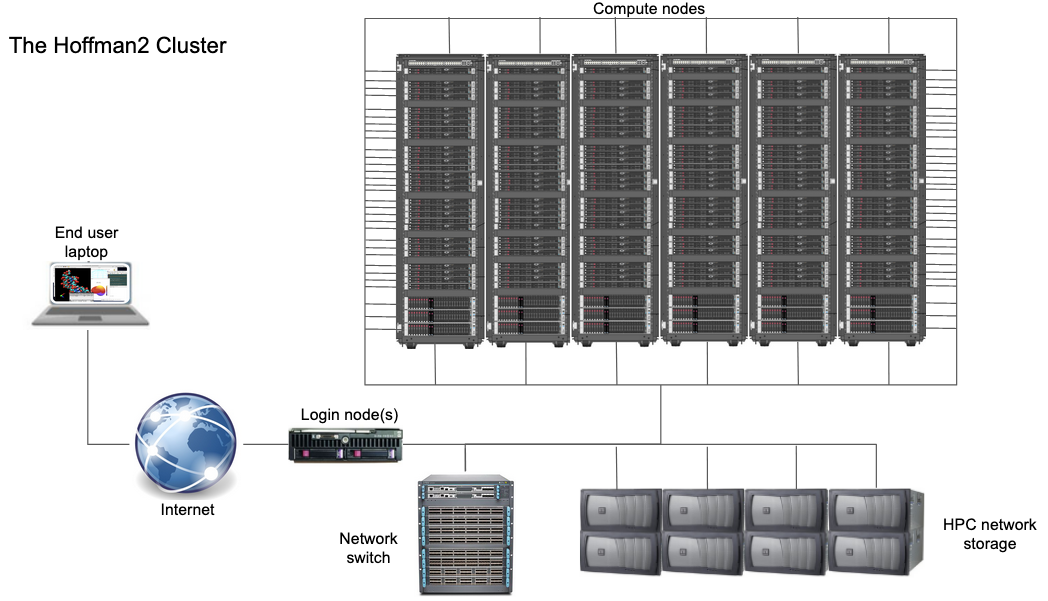

**The cluster at your fingertips**

## What type of compute nodes?


In [ ]:
qhost -F arch | tail -n +4 | xargs -l2 | grep -v ^sge | awk '{print $12,$3}'  | awk -F = '{print $2}' | sort | uniq -c | awk 'BEGIN {print "CPU-type\t\t# nodes\t\t#cores/node\t# tot. cores"} {SUM_NODES +=$1; SUM_CORES +=$1*$3; {printf "%-16s %8d\t %8d\t\t %8d\n", $2,$1,$3,$1*$3}} END {print "TOTALS\t\t\t"SUM_NODES"\t\t-\t\t\t"SUM_CORES}'

**The cluster at your fingertips** 

## How much memory per compute node & per core

In [ ]:
qhost -F arch | tail -n +4 | xargs -l2 | grep -v ^sge | awk '{print $12,$3,$8}'  | awk -F = '{print $2}' | sort | uniq -c | awk 'BEGIN {print "CPU-type\t\t# nodes\t\t#cores/node\t# tot. cores\t\tmemory/core (GB)\ttot memory (GB)"} {SUM_NODES +=$1; SUM_CORES +=$1*$3; SUM_MEM +=$4; {printf "%-16s %8d\t %8d\t\t %8d\t\t %.3f\t\t\t %.3f\n", $2,$1,$3,$1*$3,$4/$3,$4}} END {print "TOTALS\t\t\t"SUM_NODES"\t\t-\t\t\t"SUM_CORES"\t\t -\t\t\t"SUM_MEM}'

**The cluster at your fingertips**

## What type of GPU nodes (available to all users)

In [ ]:
for i in `qhost -l cuda.0.name=* | grep -v -e ^g3[0-9][0-9] -e g4[0-9][0-9] -e ^HOST -e ^--  | awk '{print $1}' | xargs`; do qconf -se $i;done | grep -e hostname -e complex_values | awk '{print $2}' | xargs -n 2 | awk -F , '{print $1}' | awk -F = '{print $1}'

## How to follow this presentation

In this presentation we assume that: 

- you already have an account on the Hoffman2 Cluster
- on your local computer you have access to a terminal and an SSH client or you have installed a remote desktop to connect to the cluster

### Where to find the commands that we will be running on your terminal

- Navigate to: https://github.com/rdauria/HPC_at_UCLA
- open the file: Hands-on-command-line-and-modules.txt
- or: open Unix shell & enviornmental modules.ipynb


## Connecting via terminal and SSH

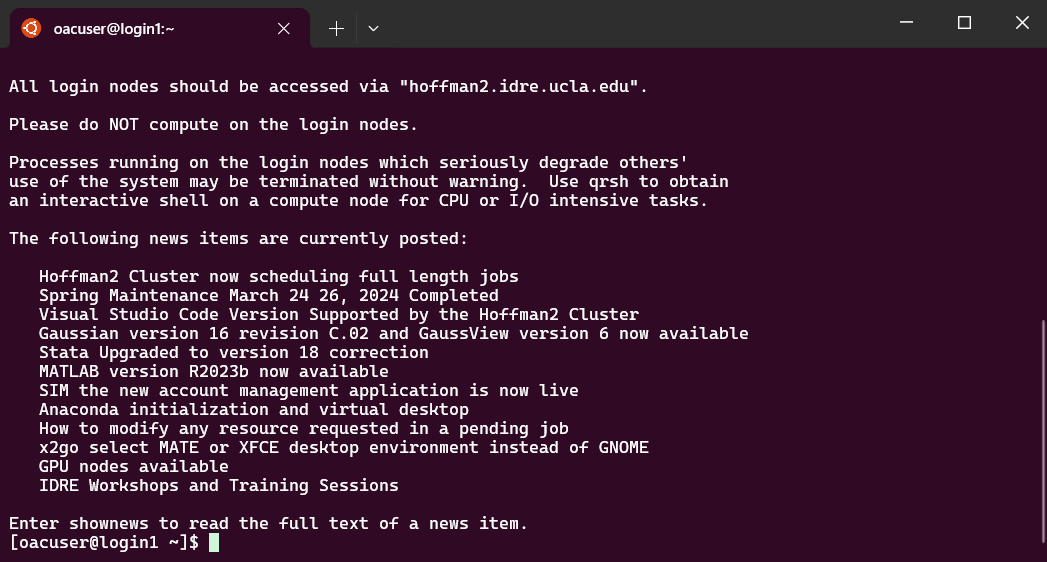

## The Unix shell 🐚

The Unix shell is an interpreter program which performs a simple loop:

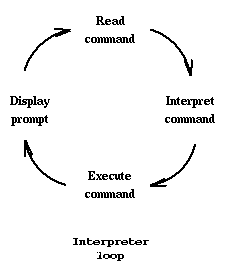


- when you open a **terminal** a **shell**, or **command-line** interpreter program, runs on it 
- the shell understands a set of commands with a specific syntax according to its type:
    - bash
    - zsh
    - tcsh
    - etc.
- the basic structure of a Unix command is: **commandname [-options] [arguments]**
    
Interpreter loop courtesy of: https://fsl.fmrib.ox.ac.uk/fslcourse/unix_intro/shell.html


## Nomenclature (somewhat interchangeable terms)

- console 📺
- terminal 
   - terminal emulator
- shell 
   - a command-line interpreter or shell that provides a command line user interface for Unix-like operating systems
- command-line interpreter or command-line interface (CLI)
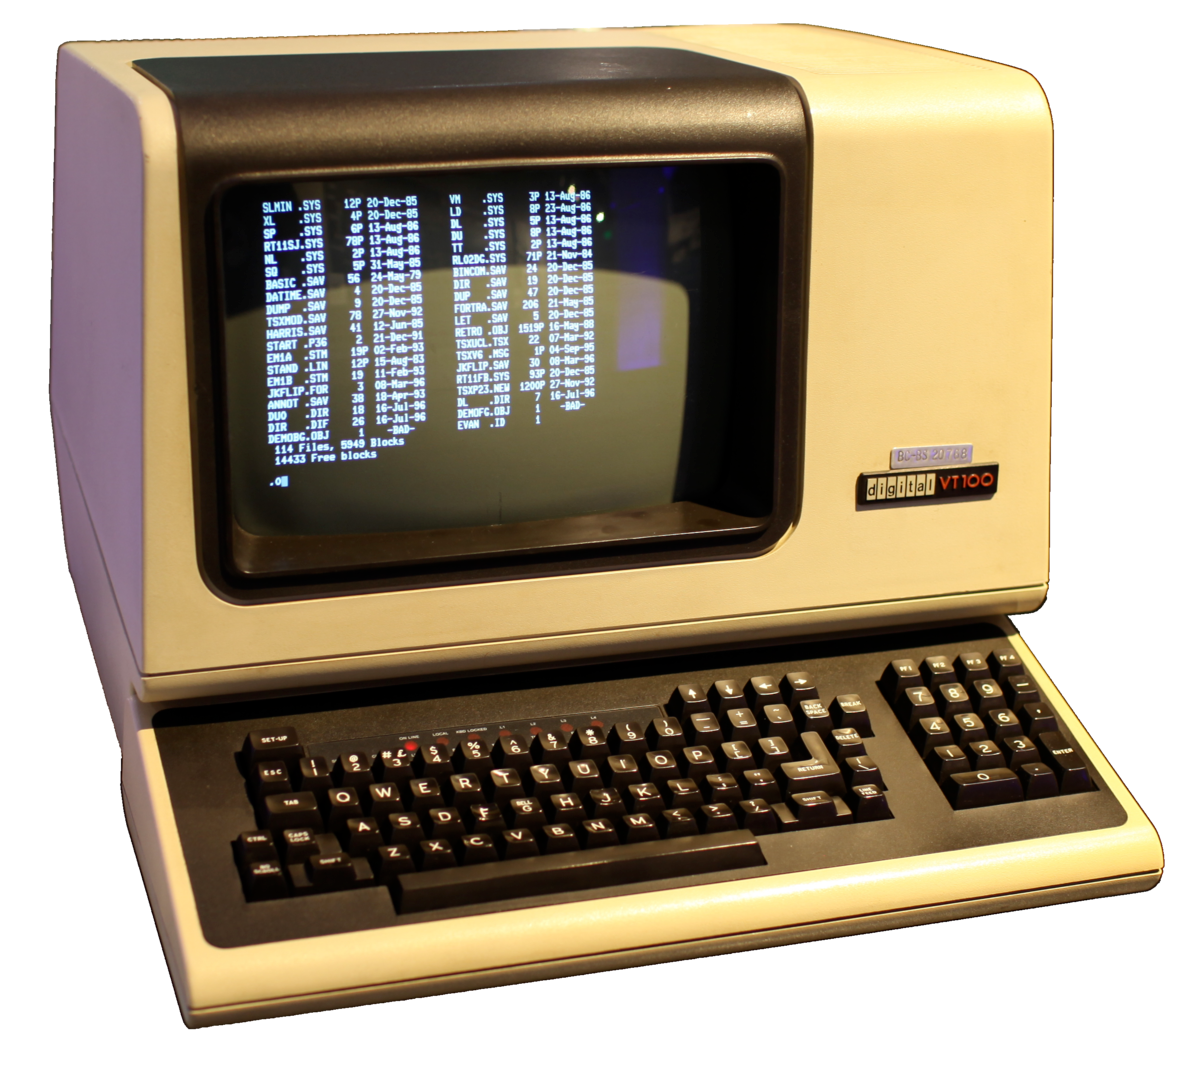

## Navigating the Unix command line -- listing files

In [ ]:
ls  

In [ ]:
ls -lh

## Navigating the Unix command line -- list files 2

In [ ]:
ls -a

In [ ]:
ls -lat

## Navigating the Unix command line -- list files 3

In [ ]:
ls -lathr

## Navigating the Unix command line -- changing directories

In [ ]:
pwd

In [ ]:
cd $SCRATCH; pwd

In [ ]:
cd -; pwd

In [ ]:
cd; pwd

In [ ]:
cd -

## HOME 🏠

- $HOME
- ~

### NAVIGATION, THE FOLLOWING ARE EQUIVALENT:

- cd $HOME
- cd ~
- cd

## Navigating the Unix command line -- creating directories

In [ ]:
timestamp=`date "+%F_%H-%M"`; mkdir '$HOME/H2HH_$timestamp'; cd '$HOME/H2HH_$timestamp' ; pwd

In [ ]:
mydir=`pwd`; echo $mydir

In [ ]:
cd - ; rmdir $HOME/H2HH_$timestamp

In [ ]:
ls $HOME/H2HH_$timestamp

In [ ]:
cd $mydir; pwd

## Getting help

In [ ]:
# man ls

## Unix shell special characters 

### Meta characters are recognized as command directives

\ / < > ! $ % ^ & * | { } [ ] " ' ` ~ ; 

In [ ]:
echo $HOME

In [ ]:
echo $HOME > myfile.$timestamp

In [ ]:
ls -lh myfile.$timestamp

In [ ]:
cat myfile.$timestamp

In [ ]:
echo $SCRATCH >> myfile.$timestamp

In [ ]:
cat myfile.$timestamp

In [ ]:
echo "TESTING TESTING" > myfile.$timestamp

In [ ]:
cat myfile.$timestamp

In [ ]:
rm -f myfile.$timestamp

## Compounding commands to generate new and awesome commands!!! 

In [ ]:
cd $HOME; pwd ; cd -; pwd

## Pipes: the real BIG deal 😎

In [ ]:
# all jobs on H2C currently pending:

qstat -s p 

In [ ]:
# first 6 lines:

qstat -s p | head -n 6

In [ ]:
# tot. no. of currently jobs pending 

qstat -s p | grep qw | wc -l

In [ ]:
#Let's count the total number of compute cores requested using some handy command line expressions:

count=1; qstat -s p | grep qw | awk -v count=$count '{count=count+$8} END {print "Total no. of cores requested: "count}'

## The magic of sed

In [ ]:
echo -e " Let's write some text here \\n there and everywhere \\n there, there" > mynewfile.$timestamp

In [ ]:
cat mynewfile.$timestamp

In [ ]:
sed -e 's/there/here/g' mynewfile.$timestamp

In [ ]:
cat mynewfile.$timestamp

In [ ]:
sed -i 's/there/here/g' mynewfile.$timestamp

In [ ]:
cat mynewfile.$timestamp

## The Awesomeness of awk

In [ ]:
awk 'END { print NR;}' mynewfile.$timestamp

In [ ]:
awk -F , '{print $1}' mynewfile.$timestamp

In [ ]:
#Let's count the total number of compute cores requested using some handy command line expressions:

count=1; qstat -s p | grep qw | awk -v count=$count '{count=count+$8} END {print "Total no. of cores requested: "count}'

### For more info see:

- https://www.gnu.org/software/gawk/manual/gawk.html
- https://opensource.com/article/20/9/awk-ebook

## Global nvironmental variables

In [ ]:
echo $HOME

In [ ]:
echo $SCRATCH  # Hoffman2-specific

In [ ]:
echo $PATH

In [ ]:
echo $LD_LIBRARY_PATH

In [ ]:
echo $SHELL

## Local environmental variables

In [ ]:
timestamp=`date "+%F_%H-%M"`; echo $timestamp

In [ ]:
# mydir=`pwd`
echo $mydir

# GLOBAL VS LOCAL:

- local variables only visible to the current shell and the commands it invokes
    - if declared within a function only visible to that function and the commands it invokes
- to make a local variable global:



In [ ]:
## FOR SH-BASED SHELLS (sh, bash, etc.)

MYVAR=MYGLOBALVAR
export MYVAR
echo "MYVAR=-$MYVAR-"

# or: export MYVAR=MYGLOBALVAR

In [ ]:
## FOR SH-BASED SHELLS (sh, bash, etc.) -- UNSET A VARIABLE

unset MYVAR
echo "MYVAR=-$MYVAR-"

In [ ]:
## FOR CSH-BASED SHELLS (csh, tcsh)

## setenv MYVAR MYGLOBALVAR
## echo "MYVAR=-$MYVAR-"

In [ ]:
## FOR CSH-BASED SHELLS (csh, tcsh) -- UNSET A VARIABLE

## unset myvar
## echo "MYVAR=-$MYVAR-"

## Adding a variable for good to your environment

In [ ]:
echo $SHELL

In [ ]:
echo "export MYDIR=$HOME/TEST" >> $HOME/.bashrc  ## ">>" VERY IMPORTANT!!!!

In [ ]:
tail -n 1 $HOME/.bashrc

## Should you every need to start afresh with ~/.bashrc

In [ ]:
ls -a /etc/skel

## Checking the content of text files

In [ ]:
# less $HOME/.bashrc    # This command may not exit on the jupyter notebook, try it instead on a terminal opened on Hoffman2

In [ ]:
# more $HOME/.bashrc  # This command may not exit on the jupyter notebook, try it instead on a terminal opened on Hoffman2

In [ ]:
cat $HOME/.bashrc

## Looking only at the beginning or end of a file

In [ ]:
head $HOME/.bashrc

In [ ]:
head -n 5 $HOME/.bashrc

In [ ]:
tail $HOME/.bashrc

In [ ]:
tail -n 5 $HOME/.bashrc

In [ ]:
# tail -f /u/systems/UGE8.6.4/hoffman2/common/accounting     # This command may not exit on the jupyter notebook, try it instead on a terminal opened on Hoffman2

## Editing files

### show in a terminal the following

```
 nano
 emacs
 vi
```

# Apps on the H2C & environmental modules

In [ ]:
module av --no-pager

## Looking for specific applications

In [ ]:
module av matlab

In [ ]:
module av python

In [ ]:
module av R

## Looking for a specific application built with any compiler

In [ ]:
modules_lookup -m R

## About python

In [ ]:
module av python anaconda3 mamba

## Looking for any application on H2C

In [ ]:
modules_lookup -a

## Looking for any application on H2C  -- part 2

In [ ]:
ls /u/local/apps

## Loading & unloading applications - R example

In [ ]:
which R

In [ ]:
module av R

In [ ]:
modules_lookup -m R

In [ ]:
module load gcc/10.2.0; module load R/4.3.0

In [ ]:
which R

### On a jupyter notebook/lab open a new notebook and select an R kernel

## Loading & unloading applications - python example

In [ ]:
module purge
which python

In [ ]:
python --version

In [ ]:
which python3

In [ ]:
module av python

In [ ]:
module load python/3.9.6

In [ ]:
which python3

## Working with Anaconda on Hoffman2

In [ ]:
module purge; module load mamba

In [ ]:
which python

## Loading conda env in jupyter notebooks

To open a jupyter notebook on an anaconda virtual environment you will need to:

1. open a terminal on Hoffman2 and issue:

```   
   qrsh -l h_data=5G # add -l rh7 to get on nodes on the next version of the OS
   module load anaconda3
   source $CONDA_DIR/etc/profile.d/conda.sh
   conda create -n MYCONDAENV python=3.7
   conda activate MYCONDAENV
   pip install ipykernel
   python -m ipykernel install --user --name=MYCONDAENV
```

2. open a terminal/gitBash/WSL on your local computer and issue:

 - for nodes on the current version of the OS:

    ```
    curl -O https://gitlab.idre.ucla.edu/dauria/jupyter-notebook/-/raw/master/h2jupynb
    python ./h2jupynb -u joebruin -v anaconda3 -t 1 -m 5   # substitute joebruin with your Hoffman2 username
    ```

  - for nodes on the next version of the OS:

    ```
    curl -O https://gitlab.idre.ucla.edu/dauria/jupyter-notebook/-/raw/master/h2jupynb_rh7
    python ./h2jupynb -u joebruin -v anaconda3 -t 1 -m 5   # substitute joebruin with your Hoffman2 username
    ```

   when the jupyter notebook opens you will see MYCONDAENV in the list of possible kernels.